# Schmidt et al. 2016 Proteome data set

© 2021 Tom Röschinger
. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT) 

***

In this notebook we will explore a huge data set in which the abundance (in terms absolute copy number) of more than 2000 proteins of *E. Coli* was measured in 22 different growth conditions. You can find the paper [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4888949/). In this notebook, we will use the tables from the supplementary information that you can find [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4888949/bin/NIHMS65833-supplement-Supplementary_tables.xlsx). This notebook will give an example on how to work with real world data, what kind of manipulations one has to do and how one can extract usefull and possibly even new information from datasets that are already around.

In [432]:
import numpy as np
import pandas as pd

import bokeh.io
import bokeh.plotting

bokeh.io.output_notebook()

Loading BokehJS ...

First we read in the dataset. The data comes in excel files, but `Pandas` has a very useful function to import excel sheets as well. For now, we are only considering a single table, so we can specify the sheet in the excel file that we want to extract. The file contains multiple level of headers, so we need to tell pandas where the headers are.

In [411]:
# Import data. Change path if necessary
df = pd.read_excel('../../data/41587_2016_BFnbt3418_MOESM18_ESM.xlsx', sheet_name='Table S6', header=[1,2])
df.head()

/Users/tomroschinger/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Unnamed: 0_level_0                                 Unnamed: 1_level_0  \
   Uniprot Accession                                        Description   
0             P0A8T7  DNA-directed RNA polymerase subunit beta' OS=E...   
1             P0A8V2  DNA-directed RNA polymerase subunit beta OS=Es...   
2             P36683  Aconitate hydratase 2 OS=Escherichia coli (str...   
3             P15254  Phosphoribosylformylglycinamidine synthase OS=...   
4             P09831  Glutamate synthase [NADPH] large chain OS=Esch...   

  Unnamed: 2_level_0             Unnamed: 3_level_0 Unnamed: 4_level_0  \
                Gene Peptides.used.for.quantitation   Confidence.score   
0               rpoC                             91            6045.53   
1               rpoB                             89            5061.29   
2               acnB                             67            4505.67   
3               purL                             65            4277.71   
4               gltB                             64            4111.74   

     Unnamed: 5_level_0 Unnamed: 6_level_0 Protein copies/cell                \
  Molecular weight (Da)            Dataset             Glucose            LB   
0           155045.0080                  2         2778.519359   7164.365261   
1           150520.2758                  2         3957.434464   8888.466379   
2            93420.9457                  2         7595.542046  16599.719405   
3           141295.8984                  2         2456.265985    820.685737   
4           163176.3153                  2         2858.930632    604.305858   

                 ...  \
  Glycerol + AA  ...   
0   4503.008971  ...   
1   5198.560850  ...   
2  17548.341931  ...   
3   2339.023495  ...   
4    651.951059  ...   

  Coefficient of Variance (%) Between Biological Triplicates (only available for Dataset 2)  \
                                                                                     Xylose   
0                                           6.274283                                          
1                                           4.266261                                          
2                                          21.777276                                          
3                                           7.879870                                          
4                                          20.053563                                          

                                                            \
     Mannose Galactose   Succinate  Fructose  Gene Bnumber   
0  16.152135  22.867137  16.451382  9.285230  rpoC   b3988   
1  13.509190  19.751833  13.599596  7.765106  rpoB   b3987   
2   3.157398   2.066660   4.211018  3.247899  acnB   b0118   
3   1.219968   7.687927   2.960045  6.197638  purL   b2557   
4  17.706768  22.361857  10.686944  8.909157  gltB   b3212   

  Functional Annotation using cluster of orthologues groups (COG)   \
                          Annotated functional COG groups (letter)   
0                                                  K                 
1                                                  K                 
2                                                  C                 
3                                                  F                 
4                                                  E                 

                                                \
  Annotated functional COG group (description)   
0                                Transcription   
1                                Transcription   
2             Energy production and conversion   
3          Nucleotide transport and metabolism   
4          Amino acid transport and metabolism   

                                       
       Annotated functional COG class  
0  INFORMATION STORAGE AND PROCESSING  
1  INFORMATION STORAGE AND PROCESSING  
2                          METABOLISM  
3                          METABOLISM  
4                          METABOLISM  

[5 

Some of the columns did not have a column header at the first level, therefore, we make our life easier and give all these columns a common level 0 header called `metadata`.

In [412]:
# Iterate through columns
rename_dict = {}
for i in range(7):
    rename_dict['Unnamed: {}_level_0'.format(i)] = "metadata"
    
# Rename level0 headers
df.rename(columns=rename_dict, inplace=True)
df.head()

metadata                                                           \
  Uniprot Accession                                        Description  Gene   
0            P0A8T7  DNA-directed RNA polymerase subunit beta' OS=E...  rpoC   
1            P0A8V2  DNA-directed RNA polymerase subunit beta OS=Es...  rpoB   
2            P36683  Aconitate hydratase 2 OS=Escherichia coli (str...  acnB   
3            P15254  Phosphoribosylformylglycinamidine synthase OS=...  purL   
4            P09831  Glutamate synthase [NADPH] large chain OS=Esch...  gltB   

                                                                         \
  Peptides.used.for.quantitation Confidence.score Molecular weight (Da)   
0                             91          6045.53           155045.0080   
1                             89          5061.29           150520.2758   
2                             67          4505.67            93420.9457   
3                             65          4277.71           141295.8984   
4                             64          4111.74           163176.3153   

          Protein copies/cell                              ...  \
  Dataset             Glucose            LB Glycerol + AA  ...   
0       2         2778.519359   7164.365261   4503.008971  ...   
1       2         3957.434464   8888.466379   5198.560850  ...   
2       2         7595.542046  16599.719405  17548.341931  ...   
3       2         2456.265985    820.685737   2339.023495  ...   
4       2         2858.930632    604.305858    651.951059  ...   

  Coefficient of Variance (%) Between Biological Triplicates (only available for Dataset 2)  \
                                                                                     Xylose   
0                                           6.274283                                          
1                                           4.266261                                          
2                                          21.777276                                          
3                                           7.879870                                          
4                                          20.053563                                          

                                                            \
     Mannose Galactose   Succinate  Fructose  Gene Bnumber   
0  16.152135  22.867137  16.451382  9.285230  rpoC   b3988   
1  13.509190  19.751833  13.599596  7.765106  rpoB   b3987   
2   3.157398   2.066660   4.211018  3.247899  acnB   b0118   
3   1.219968   7.687927   2.960045  6.197638  purL   b2557   
4  17.706768  22.361857  10.686944  8.909157  gltB   b3212   

  Functional Annotation using cluster of orthologues groups (COG)   \
                          Annotated functional COG groups (letter)   
0                                                  K                 
1                                                  K                 
2                                                  C                 
3                                                  F                 
4                                                  E                 

                                                \
  Annotated functional COG group (description)   
0                                Transcription   
1                                Transcription   
2             Energy production and conversion   
3          Nucleotide transport and metabolism   
4          Amino acid transport and metabolism   

                                       
       Annotated functional COG class  
0  INFORMATION STORAGE AND PROCESSING  
1  INFORMATION STORAGE AND PROCESSING  
2                          METABOLISM  
3                          METABOLISM  
4                          METABOLISM  

[5 rows x 78 columns]

This looks a lot better already. Next, there is a row that does not have an entry for `Gene`, so we are going to drop that row. I could not figure out a smart way of doing this using the pandas function `dropna()`, so we'll hack a way around it, keeping all rows that do have an entry for gene names.

In [413]:
df = df[df['metadata']['Gene'].notna()]

Now we can start playing around with the data. Let's see which growth conditions are included in the table.

In [414]:
growth_conditions = [x[1]  for x in df.columns if x[0] == 'Protein copies/cell']
growth_conditions

['Glucose',
 'LB',
 'Glycerol + AA',
 'Acetate',
 'Fumarate',
 'Glucosamine',
 'Glycerol',
 'Pyruvate',
 'Chemostat µ=0.5',
 'Chemostat µ=0.35',
 'Chemostat µ=0.20',
 'Chemostat µ=0.12',
 'Stationary phase 1 day',
 'Stationary phase 3 days',
 'Osmotic-stress glucose',
 '42°C glucose',
 'pH6 glucose',
 'Xylose',
 'Mannose',
 'Galactose ',
 'Succinate',
 'Fructose']

As shown in the paper, the total copy number of proteins varies across growth conditions. Therefore, it might be useful to normalize the protein count to the growth condition.

In [440]:
# Compute mean copy number per growth condition
df_norm = df['Protein copies/cell'].apply(np.mean)

# Plotting canvas
p = bokeh.plotting.figure(
    y_axis_label='Mean Protein Copy Number',
    frame_width=400,
    frame_height=300

)

# Plot mean values
p.line(np.arange(len(df_norm)), df_norm.values, line_width=2)
p.scatter(np.arange(len(df_norm)), df_norm.values, size=5)
p.xaxis.major_label_overrides = { 1: 'a', 5: 'b', 10: 'c' }
# Annotate plot
#ax.set_ylabel("Mean Protein Copy Number")
#ax.set_xticks(np.arange(len(df_norm)))
#ax.set_xticklabels(list(df_norm.index), rotation = 45, ha="right");
bokeh.io.show(p)

### Galactose Metabolism

We will start by looking at the protein copy numbers of genes involved in the metabolism of galactose. We would expect to see a large increase in copy number for proteins involed in metabolizing galactose, which should be correlated with corresponding changes in copy number for their regulators. The major proteins involved in this pathway are GalE, GalK, GalT and GalM.

In [377]:
# Genes involved in Pathway
gal_genes = ['galM', 'galK', 'galT', 'galE']

# Build data frame from these genes
sub_df = df.loc[[gene in gal_genes for gene in df['metadata']['Gene']], :]
sub_df

metadata                                                     \
    Uniprot Accession                                        Description   
362            P0A9C3  Aldose 1-epimerase OS=Escherichia coli (strain...   
389            P09147  UDP-glucose 4-epimerase OS=Escherichia coli (s...   
403            P0A6T3  Galactokinase OS=Escherichia coli (strain K12)...   
926            P09148  Galactose-1-phosphate uridylyltransferase OS=E...   

                                                           \
     Gene Peptides.used.for.quantitation Confidence.score   
362  galM                             14           986.82   
389  galE                             13           890.85   
403  galK                             13           861.04   
926  galT                              7           318.35   

                                  Protein copies/cell               \
    Molecular weight (Da) Dataset             Glucose           LB   
362           38148.75888       2         1240.095407  2363.349962   
389           37223.63088       2          620.944234  1752.439969   
403           41397.83668       2          369.004941  1786.086623   
926           39602.51619       2          150.644452   481.925530   

                   ...  \
    Glycerol + AA  ...   
362   2129.519137  ...   
389   1436.120282  ...   
403   1355.074839  ...   
926    339.916330  ...   

    Coefficient of Variance (%) Between Biological Triplicates (only available for Dataset 2)  \
                                                                                       Xylose   
362                                          11.861391                                          
389                                           5.222179                                          
403                                          13.797816                                          
926                                           5.241406                                          

                                                              \
       Mannose Galactose   Succinate  Fructose  Gene Bnumber   
362   6.026702   2.595456   3.911312  6.334639  galM   b0756   
389   9.023529  12.438760  12.725572  7.240408  galE   b0759   
403  12.425336  10.450302   6.298614  4.003475  galK   b0757   
926   2.521330   4.549502   7.703505  9.885173  galT   b0758   

    Functional Annotation using cluster of orthologues groups (COG)   \
                            Annotated functional COG groups (letter)   
362                                                  G                 
389                                                  M                 
403                                                  G                 
926                                                  C                 

                                                  \
    Annotated functional COG group (description)   
362        Carbohydrate transport and metabolism   
389       Cell wall/membrane/envelope biogenesis   
403        Carbohydrate transport and metabolism   
926             Energy production and conversion   

                                       
       Annotated functional COG class  
362                        METABOLISM  
389  CELLULAR PROCESSES AND SIGNALING  
403                        METABOLISM  
926                        METABOLISM  

[4 rows x 78 columns]

Let's write a function that returns a plot of the copy numbers for a list of genes across all growth conditions.

In [378]:
def copy_number_plot(genes, normalized=False):
    """
    Plot the copy number of a list of genes in all 
    growth conditions.
    """
    
    fig, ax = plt.subplots(figsize=(8,6))

    # Iterate through genes
    for i, gene in enumerate(genes):
        # Extract row for gene
        row = sub_df.loc[sub_df['metadata']['Gene'] == gene, :]
        # Get protein copy numbers
        y = row['Protein copies/cell'].values[0]
        # Normalize
        if normalized:
            y = y / df_norm.values
        
        # Plot and make label
        ax.plot(
            y, 
            label="{} ({})".format(gene, row['Functional Annotation using cluster of orthologues groups (COG) ']\
                                   ['Annotated functional COG class'].values[0]))


    # Annotate plot
    if normalized:
        ax.set_ylabel("Normalized Protein Copy Number")
    else:
        ax.set_ylabel("Protein Copy Number")
    ax.legend(bbox_to_anchor=(1.05, 1))
    ax.set_xticks(np.arange(len(growth_conditions)))
    ax.set_xticklabels(labels=growth_conditions, rotation = 45, ha="right");
    return ax

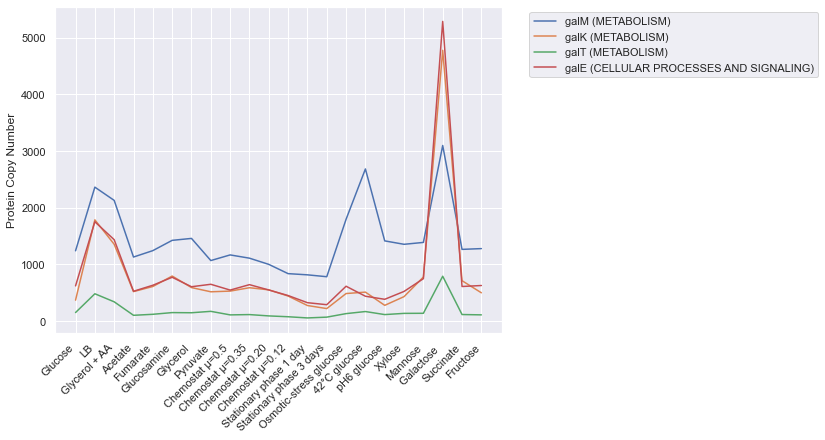

In [379]:
copy_number_plot(gal_genes);

We can clearlyy see how the genes related with galactose metabolism are up-regulated in the presence of the sugar. Before we make any final conclusions, let's look at the plot when we normalize the copy number in each growth condition to the mean copy number of all proteins in this condition.

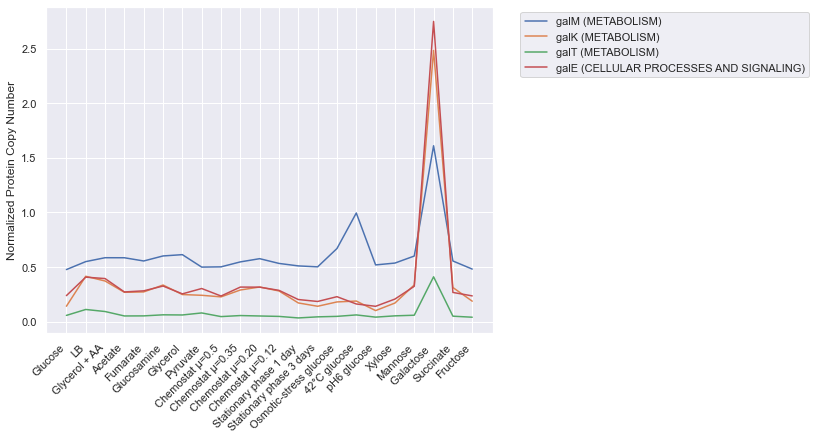

In [380]:
copy_number_plot(gal_genes, normalized=True);

This looks very smooth already. We can see that the galactose-metabolism related proteins have relatively low abundace in the absence of the sugar, but then are upregulated 2-5 fold compared to the rest of the proteome when the growth media is supplemented with galactose.

There is significant correlation between the genes. When looking at the genetic locus in *E. coli* we can see immediately why.

![](gal_operon.png)

All the genes we investigated are on the same operon! (Which is not surprising for people who know that genes are often named after the operon they are found in.) Let's have a look one of the regulators, **GalS**. We would also check out GalR, but it is not included in this dataset.

![](galS.png)

The regulator GalS is a self regulator, meaning it controls its own expression. Let's look at the copy numper of this regulator.

In [381]:
# Genes involved in Pathway
gene_list = ['galE', 'galS']

# Build data frame from these genes
sub_df = df.loc[[gene in gene_list for gene in df['metadata']['Gene']], :]
sub_df

metadata                                                     \
     Uniprot Accession                                        Description   
389             P09147  UDP-glucose 4-epimerase OS=Escherichia coli (s...   
1834            P25748  HTH-type transcriptional regulator galS OS=Esc...   

                                                            \
      Gene Peptides.used.for.quantitation Confidence.score   
389   galE                             13           890.85   
1834  galS                              2            71.15   

                                   Protein copies/cell               \
     Molecular weight (Da) Dataset             Glucose           LB   
389            37223.63088       2          620.944234  1752.439969   
1834           37315.00407       2            0.008516     0.013154   

                    ...  \
     Glycerol + AA  ...   
389    1436.120282  ...   
1834      0.011664  ...   

     Coefficient of Variance (%) Between Biological Triplicates (only available for Dataset 2)  \
                                                                                        Xylose   
389                                            5.222179                                          
1834                                           1.255111                                          

                                                                   \
         Mannose  Galactose   Succinate    Fructose  Gene Bnumber   
389     9.023529   12.438760  12.725572    7.240408  galE   b0759   
1834  138.324897  146.156985  88.012007  137.597156  galS   b2151   

     Functional Annotation using cluster of orthologues groups (COG)   \
                             Annotated functional COG groups (letter)   
389                                                   M                 
1834                                                  K                 

                                                   \
     Annotated functional COG group (description)   
389        Cell wall/membrane/envelope biogenesis   
1834                                Transcription   

                                          
          Annotated functional COG class  
389     CELLULAR PROCESSES AND SIGNALING  
1834  INFORMATION STORAGE AND PROCESSING  

[2 rows x 78 columns]

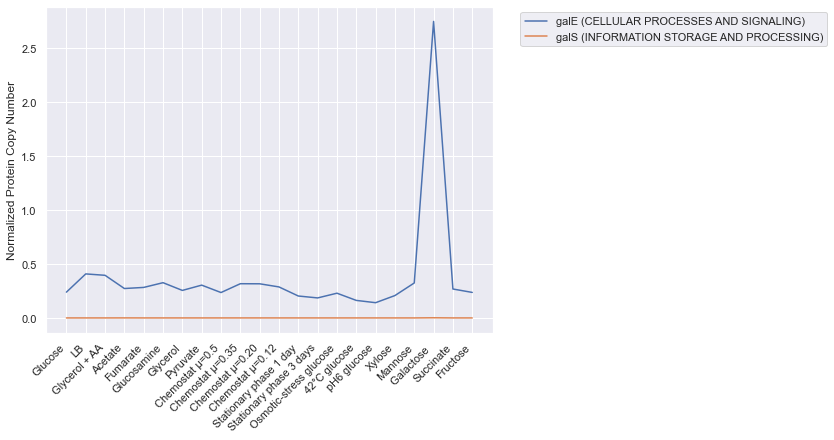

In [382]:
copy_number_plot(gene_list, normalized=True);

This looks like the copy number of the transcription factor is zero in all conditions! However, this is an illusion as we see now. When one wants to plot values of different orders of magnitude, one has to be a little more careful not to draw conclusions from plotting artifacts. One way of solving this issue, os 

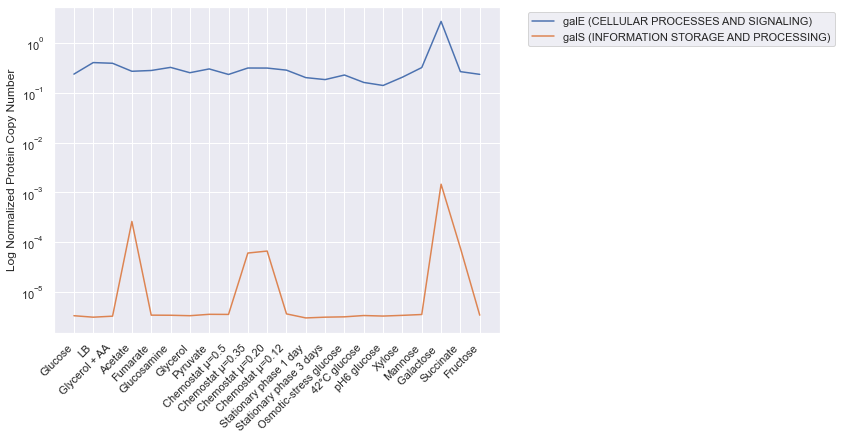

In [389]:
# Assign plot to variable
ax = copy_number_plot(gene_list, normalized=True);
# Change scale of plot to log
ax.set_yscale('log')
# Change y-label of plot
ax.set_ylabel('Log ' + ax.get_ylabel());


### Glycerol Metabolism

In [390]:
gly_genes = ['glpF', 'glpK', 'glpD', 'glpA', 'glpB', 'glpC', 'glpR', 'glpE']
sub_df = df.loc[[gene in gly_genes for gene in df['metadata']['Gene']], :]
sub_df

metadata                                                     \
     Uniprot Accession                                        Description   
46              P0A6F3  Glycerol kinase OS=Escherichia coli (strain K1...   
90              P13035  Aerobic glycerol-3-phosphate dehydrogenase OS=...   
375             P0A9C0  Anaerobic glycerol-3-phosphate dehydrogenase s...   
1384            P0AER0  Glycerol uptake facilitator protein OS=Escheri...   
1401            P13033  Anaerobic glycerol-3-phosphate dehydrogenase s...   
1829            P0ACL0  Glycerol-3-phosphate regulon repressor OS=Esch...   
1950            P0A996  Anaerobic glycerol-3-phosphate dehydrogenase s...   
2114            P0A6V5  Thiosulfate sulfurtransferase glpE OS=Escheric...   

                                                            \
      Gene Peptides.used.for.quantitation Confidence.score   
46    glpK                             35          2432.72   
90    glpD                             29          1604.83   
375   glpA                             14           681.29   
1384  glpF                              4           165.43   
1401  glpB                              4           184.33   
1829  glpR                              2            86.36   
1950  glpC                              2            77.58   
2114  glpE                              1            24.56   

                                   Protein copies/cell                \
     Molecular weight (Da) Dataset             Glucose            LB   
46             56177.25025       2          495.972340  13193.610985   
90             56697.06997       2          135.227439   3852.409336   
375            58903.37347       2           14.226265    463.484648   
1384           29742.55109       2           45.661209    628.826323   
1401           45310.44439       2            3.596787    379.585780   
1829           28012.40604       2           75.002105    144.835456   
1950           44061.53167       2            0.006470     40.431248   
2114           12056.61516       2           12.855357     37.182657   

                    ...  \
     Glycerol + AA  ...   
46    24980.433590  ...   
90     5701.656442  ...   
375     470.954946  ...   
1384   2534.699322  ...   
1401    359.586412  ...   
1829    109.396176  ...   
1950     11.638196  ...   
2114     27.663285  ...   

     Coefficient of Variance (%) Between Biological Triplicates (only available for Dataset 2)  \
                                                                                        Xylose   
46                                            16.153107                                          
90                                             1.865734                                          
375                                           32.498452                                          
1384                                          30.191410                                          
1401                                          28.925625                                          
1829                                           6.858672                                          
1950                                         113.524394                                          
2114                                          43.530785                                          

                                                                 \
        Mannose Galactose   Succinate    Fructose  Gene Bnumber   
46     8.647856  10.014636  28.739182   30.637720  glpK   b3926   
90     8.149426  17.343335   5.991387   11.172510  glpD   b3426   
375   12.899456  21.562505  16.951355   28.750233  glpA   b2241   
1384   9.075639  28.025712  27.641877   17.421802  glpF   b3927   
1401  17.467107  39.251406  41.046829   45.034863  glpB   b2242   
1829   4.460129  17.016219  21.976616    6.355208  glpR   b3423   
1950  77.689332  85.069377   0.647462  113.290375  glpC   b2243   
2114  32.538127  49.293429  84.087238   16.419

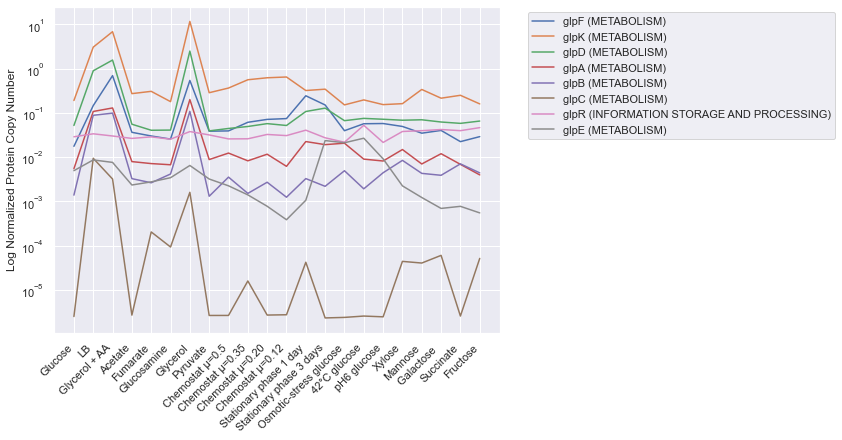

In [394]:
# Assign plot to variable
ax = copy_number_plot(gly_genes, normalized=True);
# Change scale of plot to log
ax.set_yscale('log')
# Change y-label of plot
ax.set_ylabel('Log ' + ax.get_ylabel());


In [408]:
regseq_genes = ['ftsK', 'lexA']
sub_df = df.loc[[gene in regseq_genes for gene in df['metadata']['Gene']], :]
sub_df

metadata                                                     \
    Uniprot Accession                                        Description   
588            P0A7C2  LexA repressor OS=Escherichia coli (strain K12...   
921            P46889  DNA translocase ftsK OS=Escherichia coli (stra...   

                                                           \
     Gene Peptides.used.for.quantitation Confidence.score   
588  lexA                             10           589.13   
921  ftsK                              7           327.87   

                                  Protein copies/cell               \
    Molecular weight (Da) Dataset             Glucose           LB   
588           22325.88481       2          559.834312  1027.397068   
921          146553.50190       2           32.957486    65.947177   

                   ...  \
    Glycerol + AA  ...   
588    754.563441  ...   
921     36.942141  ...   

    Coefficient of Variance (%) Between Biological Triplicates (only available for Dataset 2)  \
                                                                                       Xylose   
588                                           5.815413                                          
921                                          38.395105                                          

                                                               \
       Mannose Galactose   Succinate   Fructose  Gene Bnumber   
588  20.733234   2.836888   6.376817   5.062267  lexA   b4043   
921  31.573370  55.834052  30.140065  15.401972  ftsK   b0890   

    Functional Annotation using cluster of orthologues groups (COG)   \
                            Annotated functional COG groups (letter)   
588                                                 KT                 
921                                                  D                 

                                                        \
          Annotated functional COG group (description)   
588                                      Transcription   
921  Cell cycle control, cell division, chromosome ...   

                                         
         Annotated functional COG class  
588  INFORMATION STORAGE AND PROCESSING  
921    CELLULAR PROCESSES AND SIGNALING  

[2 rows x 78 columns]

### Stationary Phase

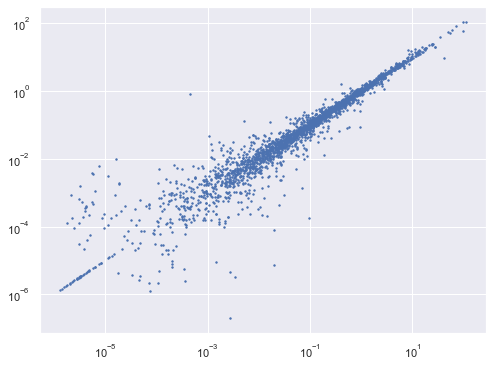

In [431]:
df_stat = pd.concat(
    [df['metadata']['Gene'], 
     df['Protein copies/cell'][['Stationary phase 1 day', 'Stationary phase 3 days']]], 
    axis=1
)
df_stat.rename(columns={'Stationary phase 1 day': 'stat1', 'Stationary phase 3 days': 'stat3'}, inplace=True)

df_stat['stat1_norm'] = df_stat.stat1 / np.mean(df_stat.stat1)
df_stat['stat3_norm'] = df_stat.stat3 / np.mean(df_stat.stat3)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.scatter(df_stat['stat1_norm'].values, df_stat['stat3_norm'].values, s=2)
ax.set_yscale('log')
ax.set_xscale('log')